<a href="https://colab.research.google.com/github/suhanik19/HeartFailurePrediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Dataset:
This [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations

Hungarian: 294 observations

Switzerland: 123 observations

Long Beach VA: 200 observations

Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

**Final dataset: 918 observations**

In [71]:
cols = ["age", "sex", "chestpain", "bp", "chol", "bloodsugar", "restecg", "maxhr", "exang", "oldpeak", "slope", "target"]
df = pd.read_csv("heart.csv", header=0, index_col=None, names = cols)

chestpain_mapping = {'TA': 0,'ATA': 1,'NAP': 2,'ASY': 3}

restecg_mapping = {'Normal': 0,'ST': 1,'LVH': 2}

slope_mapping = {'Up': 0,'Flat': 1,'Down': 2}

df['sex'] = (df['sex'] == 'M').astype(int)
df['chestpain'] = df['chestpain'].map(chestpain_mapping)
df['restecg'] = df['restecg'].map(restecg_mapping)
df['exang'] = (df['exang'] == 'Y').astype(int)
df['slope'] = df['slope'].map(slope_mapping)

df.head()

,age,sex,chestpain,bp,chol,bloodsugar,restecg,maxhr,exang,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


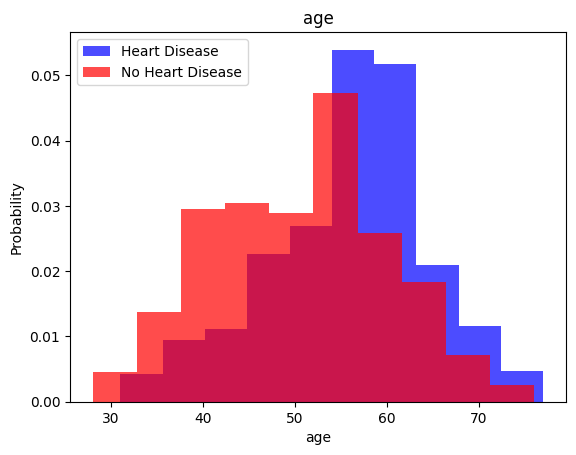

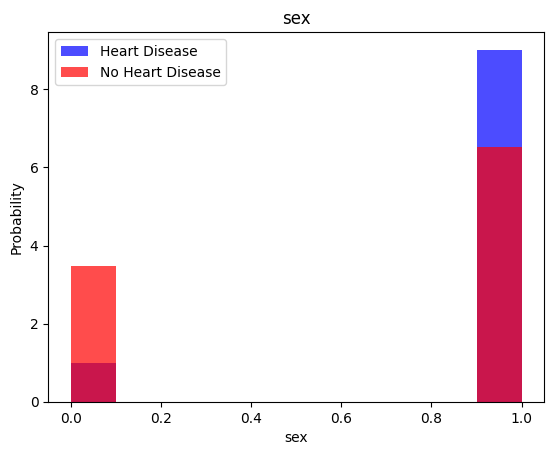

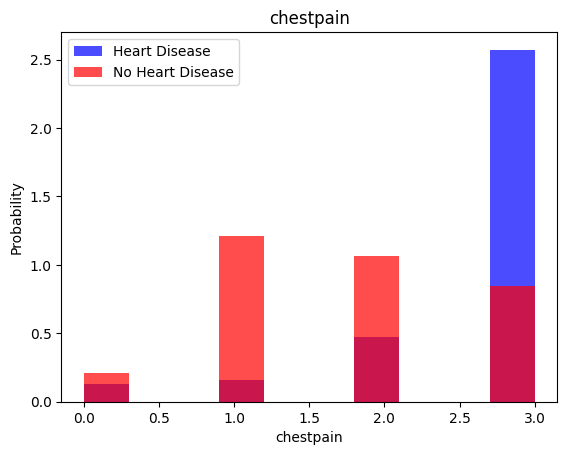

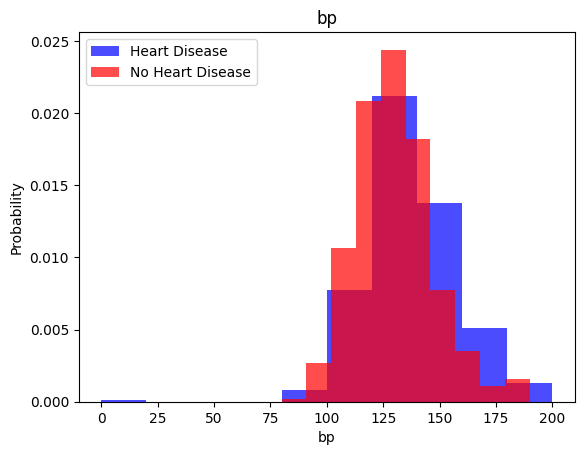

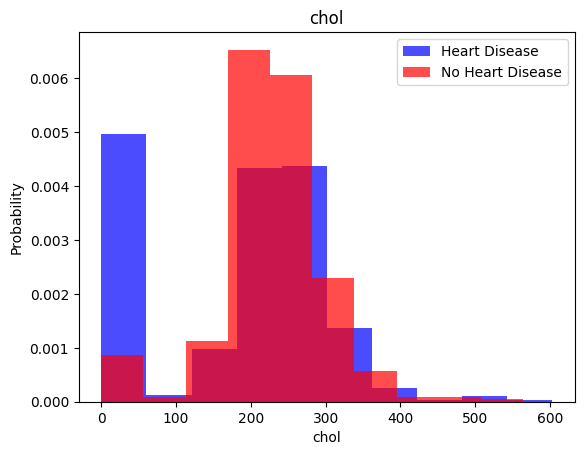

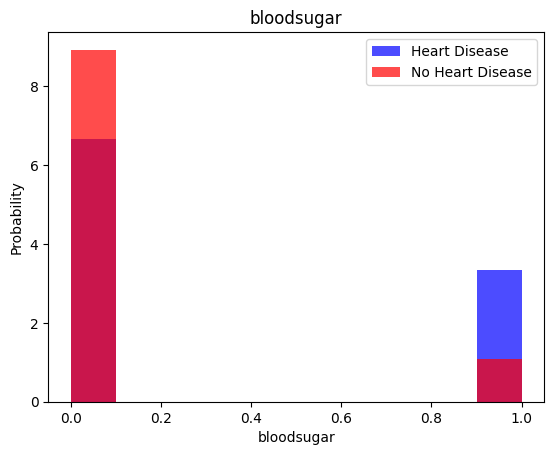

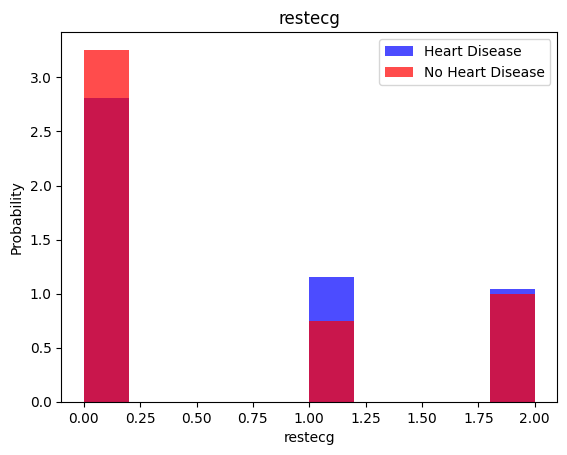

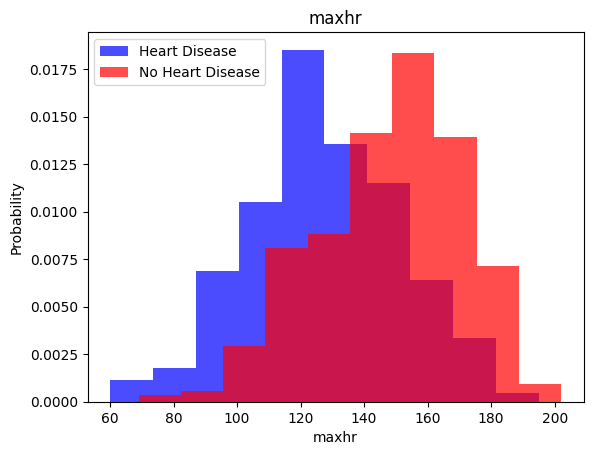

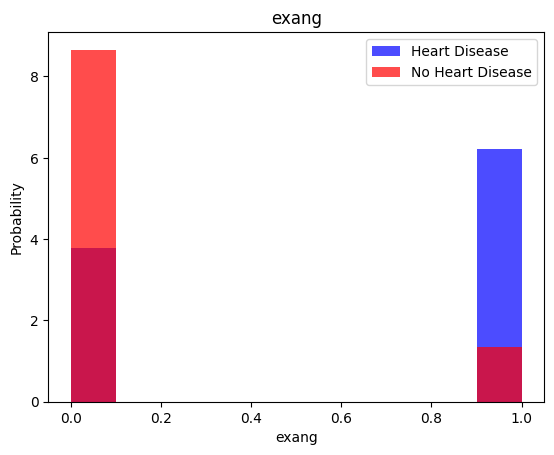

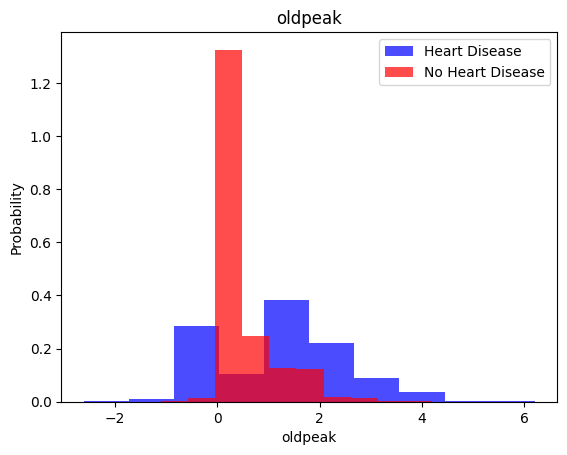

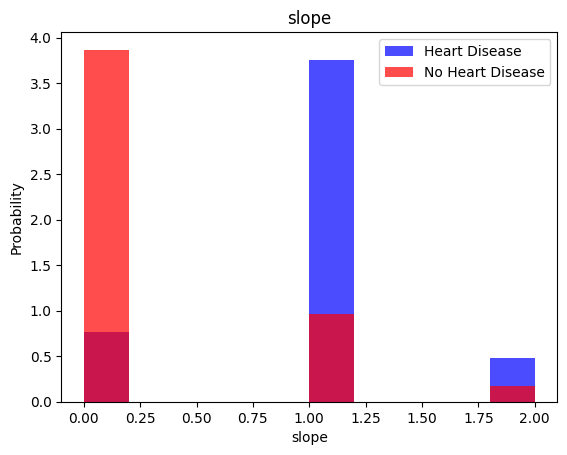

In [72]:
for label in cols[:-1]:
  plt.hist(df[df["target"] == 1][label], color='blue', label='Heart Disease', alpha=0.7, density=True)
  plt.hist(df[df["target"] == 0][label], color='red', label='No Heart Disease', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

After looking at the correlation matrix, I was able to determine whether there were patterns between the certain attribute and having heart disease.

Age: higher probability between ages 55-65

Sex: more males (1) than females

Chest Pain: Asymptomatic

Blood Pressure: no correlation

Cholesterol: very low cholesterol (between 0-50)

Blood sugar: 0.9-1.0

Rest ECG: no correlation

Max HR: lower values (between 100-130)

Exercise Induced Angina: Yes

Old Peak: no correlation

Slope: flat


## Correlation Matrix

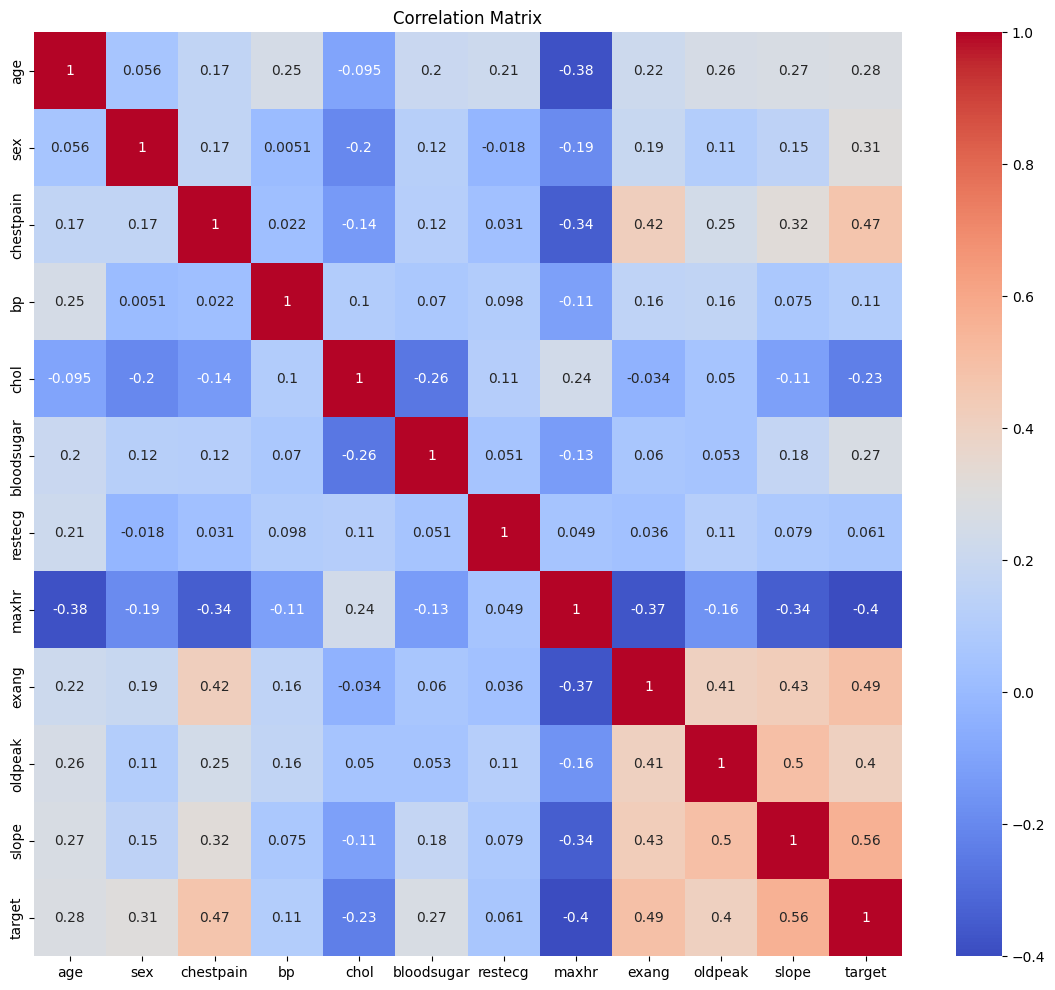

In [73]:
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Train, validation, test datasets

In [74]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [75]:
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [76]:
train, X_train, y_train = scale_dataset(train)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [78]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [79]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))
lg_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        82
           1       0.86      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(X_train, y_train)

In [81]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))
knn_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        82
           1       0.86      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Decision Trees

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model = dtree_model.fit(X_train, y_train)

In [83]:
y_pred = dtree_model.predict(X_test)
print(classification_report(y_test, y_pred))
dtree_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        82
           1       0.86      0.84      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



## Random Forests

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

In [85]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
rf_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



## Support Vector Machine

In [86]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [87]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
svm_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        82
           1       0.85      0.94      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



## Gradient Boosting Machines

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()
gbm_model = gbm_model.fit(X_train, y_train)

In [89]:
y_pred = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred))
gbm_model_accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        82
           1       0.87      0.94      0.91       102

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



## Results

In [90]:
results_df = pd.DataFrame({
    'Model': ["Logistic Regression", "K-Nearest Neighbors", "Decision Trees", "Random Forests", "Support Vector Machine", "Gradient Boosting Machines"],
    'Accuracy': [lg_model_accuracy, knn_model_accuracy, dtree_model_accuracy, rf_model_accuracy, svm_model_accuracy, gbm_model_accuracy]
})

print(results_df)

                        Model  Accuracy
0         Logistic Regression  0.864130
1         K-Nearest Neighbors  0.864130
2              Decision Trees  0.836957
3              Random Forests  0.885870
4      Support Vector Machine  0.875000
5  Gradient Boosting Machines  0.891304
